In [26]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [18]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import metpy.plots.mapping
import numpy as np

In [2]:
# stored as data-array with projection info as coord

In [8]:
da = xr.open_dataarray("GOES16_true_color_20200202T134013Z.nc").squeeze()
da

<xarray.DataArray 'true_color' (band: 4, y: 1066, x: 2028)>
[8647392 values with dtype=float64]
Coordinates:
  * band                    (band) int64 1 2 3 4
  * x                       (x) float64 1.569e+06 1.57e+06 ... 2.585e+06
  * y                       (y) float64 1.721e+06 1.721e+06 ... 1.188e+06
    goes_imager_projection  int32 ...
Attributes:
    grid_mapping:  goes_imager_projection

In [9]:
crs = da.to_dataset().metpy.parse_cf(da.name).metpy.cartopy_crs

In [53]:
def _create_bbox(da, crop_to_contain=True):
    domain_corners_xy = np.array(
        [
            (da.x.min(), da.y.min()),  # SW
            (da.x.max(), da.y.min()),  # SE
            (da.x.min(), da.y.max()),  # NW
            (da.x.max(), da.y.max()),  # NE
        ]
    )

    corners_latlon = ccrs.PlateCarree().transform_points(
        crs, domain_corners_xy[:, 0], domain_corners_xy[:, 1]
    )

    # WESN
    if False:
        bbox = [
            corners_latlon[:, 0].min(),
            corners_latlon[:, 0].max(),
            corners_latlon[:, 1].min(),
            corners_latlon[:, 1].max(),
        ]
    else:
        bbox = [
            corners_latlon[::2, 0].max(),
            corners_latlon[1::2, 0].min(),
            corners_latlon[:2, 1].max(),
            corners_latlon[2:, 1].min(),
        ]

    return bbox

<IPython.core.display.Javascript object>

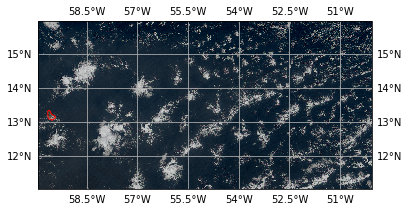

<IPython.core.display.Javascript object>

In [55]:
def add_overlay(ax=None):
    if ax is None:
        fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))

    if ax.get_xlim() == (0, 1) or ax.get_ylim() == (0, 1):
        bbox = _create_bbox(da)
        ax.set_extent(bbox, crs=ccrs.PlateCarree())
    da.drop(da.grid_mapping).plot.imshow(rgb="band", ax=ax, transform=crs)

    return ax


fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
add_overlay(ax=ax)
ax.gridlines(draw_labels=True)
ax.coastlines(resolution="10m", color="red")

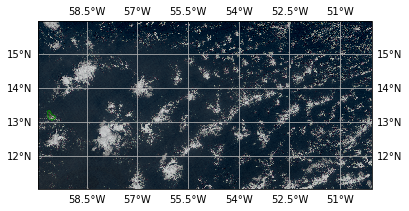

<IPython.core.display.Javascript object>

In [56]:
ax = add_overlay()
ax.gridlines(draw_labels=True)
ax.coastlines(resolution="10m", color="green")

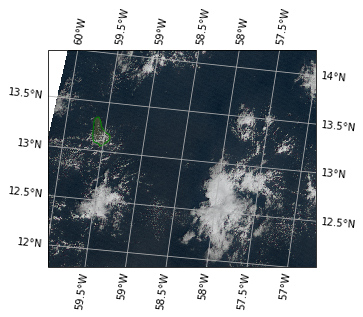

<IPython.core.display.Javascript object>

In [62]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.AzimuthalEquidistant()))
ax.set_extent([-60, -57, 12, 14], crs=ccrs.PlateCarree())
ax = add_overlay(ax=ax)
ax.gridlines(draw_labels=True)
ax.coastlines(resolution="10m", color="green")

In [17]:
# stored as data-set with projection info as data variable

In [18]:
ds = xr.open_dataset("true_color_20200202_134013.nc").squeeze()
ds

<xarray.Dataset>
Dimensions:                        (band: 4, x: 2028, y: 1066)
Coordinates:
  * band                           (band) int64 1 2 3 4
  * x                              (x) float64 1.569e+06 1.57e+06 ... 2.585e+06
  * y                              (y) float64 1.721e+06 1.721e+06 ... 1.188e+06
    goes_imager_projection         int32 ...
Data variables:
    __xarray_dataarray_variable__  (band, y, x) float64 ...

In [4]:
ds.metpy.parse_cf("truecolor_rgb").metpy.cartopy_crs

<Derived Projected CRS: +proj=geos +a=6378137.0 +b=6356752.31414 +rf=298.2 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Geostationary Satellite (Sweep X)
Datum: unknown
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<IPython.core.display.Javascript object>

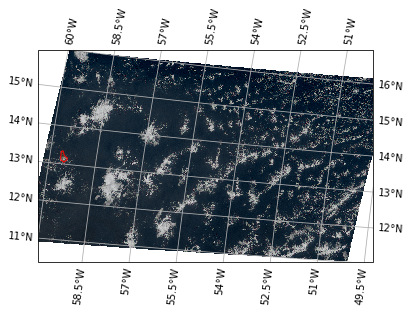

<IPython.core.display.Javascript object>

In [6]:
da = ds.truecolor_rgb

fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.AzimuthalEquidistant()))

BBOX = [-60, -50, 11, 16]  # WESN

ax.set_extent(BBOX, crs=ccrs.PlateCarree())
crs = ds.metpy.parse_cf("truecolor_rgb").metpy.cartopy_crs
da.plot.imshow(rgb="band", ax=ax, transform=crs)

ax.gridlines(draw_labels=True)
ax.coastlines(resolution="10m", color="red")

In [9]:
da = xr.open_dataarray("true_color_20200202_134013.nc").squeeze()


<xarray.Dataset>
Dimensions:                 (band: 4, x: 2028, y: 1066)
Coordinates:
  * band                    (band) int64 1 2 3 4
  * x                       (x) float64 1.569e+06 1.57e+06 ... 2.585e+06
  * y                       (y) float64 1.721e+06 1.721e+06 ... 1.188e+06
    goes_imager_projection  int32 ...
Data variables:
    truecolor_rgb           (band, y, x) float64 ...

In [11]:
crs = da.to_dataset(name="truecolor_rgb").metpy.parse_cf("truecolor_rgb").metpy.cartopy_crs
crs

<Derived Projected CRS: +proj=geos +a=6378137.0 +b=6356752.31414 +rf=298.2 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Geostationary Satellite (Sweep X)
Datum: unknown
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
da

<xarray.DataArray (band: 4, y: 1066, x: 2028)>
[8647392 values with dtype=float64]
Coordinates:
  * band                    (band) int64 1 2 3 4
  * x                       (x) float64 1.569e+06 1.57e+06 ... 2.585e+06
  * y                       (y) float64 1.721e+06 1.721e+06 ... 1.188e+06
    goes_imager_projection  int32 -2147483647
Attributes:
    grid_mapping:  goes_imager_projection

In [ ]:
da.max()

In [ ]:
(da / 255).plot.imshow(rgb="band")

In [ ]:
xr.open_dataset("true_color_20200202_134013.nc")

In [4]:
ds_ch1 = xr.open_dataset("noaa-goes16/ABI-L1b-RadF/2020/016/15/OR_ABI-L1b-RadF-M6C01_G16_s20200161540197_e20200161549505_c20200161549569.nc")
ds_ch1

<xarray.Dataset>
Dimensions:                                           (y: 10848, x: 10848,
                                                       number_of_time_bounds: 2,
                                                       number_of_image_bounds: 2,
                                                       band: 1,
                                                       num_star_looks: 24)
Coordinates:
    t                                                 datetime64[ns] ...
  * y                                                 (y) float32 0.1519 ... ...
  * x                                                 (x) float32 -0.1519 ......
    y_image                                           float32 ...
    x_image                                           float32 ...
    band_id                                           (band) int8 ...
    band_wavelength                                   (band) float32 ...
    t_star_look                                       (num_star_looks) datetime64[ns] ...
    band_wavelength_star_look                         (num_star_looks) float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                band, num_star_looks
Data variables: (12/35)
    Rad                                               (y, x) float32 ...
    DQF                                               (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    y_image_bounds                                    (number_of_image_bounds) float32 ...
    x_image_bounds                                    (number_of_image_bounds) float32 ...
    ...                                                ...
    percent_uncorrectable_L0_errors                   float32 ...
    earth_sun_distance_anomaly_in_AU                  float32 ...
    algorithm_dynamic_input_data_container            int32 ...
    processing_parm_version_container                 int32 ...
    algorithm_product_version_container               int32 ...
    star_id                                           (num_star_looks) float32 ...
Attributes: (12/30)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    production_site:           RBU
    ...                        ...
    timeline_id:               ABI Mode 6
    date_created:              2020-01-16T15:49:56.9Z
    time_coverage_start:       2020-01-16T15:40:19.7Z
    time_coverage_end:         2020-01-16T15:49:50.5Z
    LUT_Filenames:             SpaceLookParams(FM1A_CDRL79RevP_PR_08_01_01)-6...
    id:                        07c9ee9a-122b-4034-a460-d288bf3c9c26

In [5]:
ds

<xarray.Dataset>
Dimensions:                 (band: 4, x: 2028, y: 1066)
Coordinates:
  * band                    (band) int64 1 2 3 4
  * x                       (x) float64 1.569e+06 1.57e+06 ... 2.585e+06
  * y                       (y) float64 1.721e+06 1.721e+06 ... 1.188e+06
Data variables:
    truecolor_rgb           (band, y, x) float64 ...
    goes_imager_projection  int32 -2147483647